<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary libraries
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import threading
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/Groceries_dataset - Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
data_sample=data.sample(30000)
data_sample

,Member_number,Date,itemDescription
1954,1047,09-08-2015,sweet spreads
24718,4760,02-04-2015,semi-finished bread
7315,2236,03-02-2015,meat
17841,4344,06-05-2015,specialty bar
29646,1944,10-08-2014,cake bar
...,...,...,...
11842,4347,09-07-2014,citrus fruit
19605,2592,23-04-2015,fruit/vegetable juice
10380,2595,06-01-2014,curd
25895,4886,18-09-2014,sliced cheese


In [4]:
#checking for null values
data_sample.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
#Findind the count of each of the items bought
item_count= data_sample['itemDescription'].value_counts().sort_values(ascending=False)[:10]
item_count

whole milk          1913
other vegetables    1484
rolls/buns          1331
soda                1159
yogurt              1054
root vegetables      830
tropical fruit       779
sausage              720
bottled water        717
citrus fruit         625
Name: itemDescription, dtype: int64

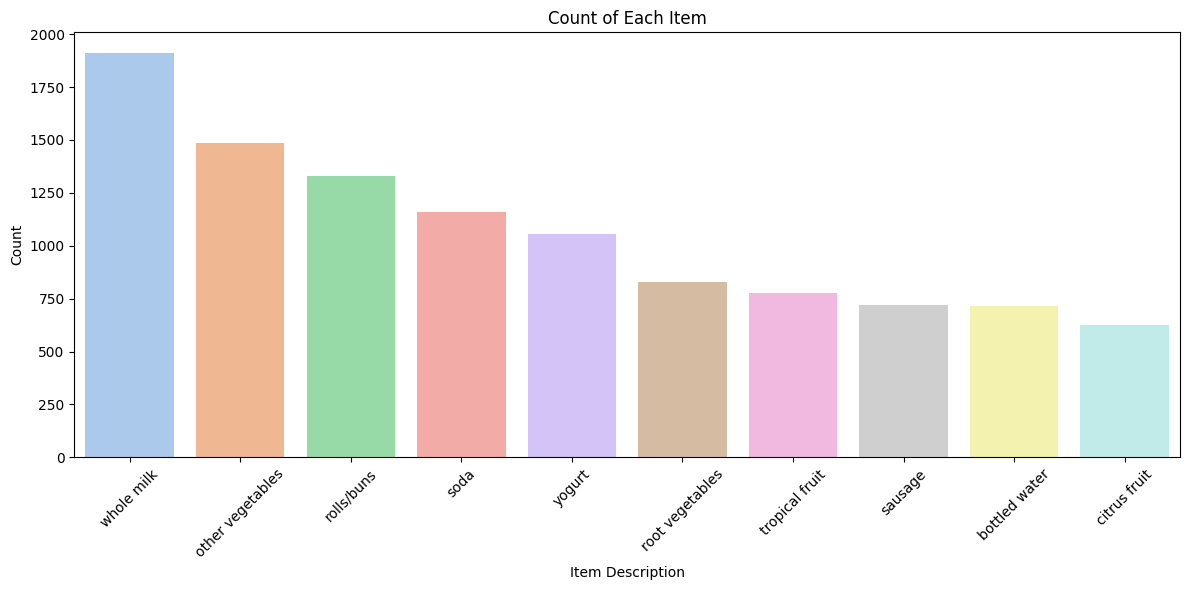

In [6]:
#Bar graph:- showing the count of each item
plt.figure(figsize=(12, 6))
sns.barplot(x=item_count.index, y=item_count.values, palette="pastel")
plt.xticks(rotation=45)
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.title('Count of Each Item')
plt.tight_layout()
plt.show()


In [7]:
#adding a new column
data_sample['Quantity'] = 1


In [8]:
transactions=[]
for index,row in data_sample.iterrows():
  transactions.append(row.dropna().tolist())

In [9]:
encoded=pd.get_dummies(pd.DataFrame(transactions).stack()).sum(level=0)
transactiondf=(encoded>0).astype(int)

In [10]:
transactiondf

,1,1000,1001,1002,1003,1004,1005,1006,1008,1009,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Multi-threading fro both the algo's
apicompleted=threading.Event()
fpcompleted=threading.Event()

In [12]:
exetime=[0,0]

In [13]:
def runapi():
  stime=time.time()
  apiresults=apriori(transactiondf,min_support=0.02,use_colnames=True)
  exetime[0]=time.time()-stime
  apicompleted.set()

In [14]:
def runfp():
  stime=time.time()
  fpresults=fpgrowth(transactiondf,min_support=0.02,use_colnames=True)
  exetime[1]=time.time()-stime
  fpcompleted.set()

In [15]:
apriori_thread=threading.Thread(target=runapi)
fp_growth_thread=threading.Thread(target=runfp)

In [16]:
apriori_thread.start()
fp_growth_thread.start()
apicompleted.wait()
fpcompleted.wait()
apriori_thread.join()
fp_growth_thread.join()

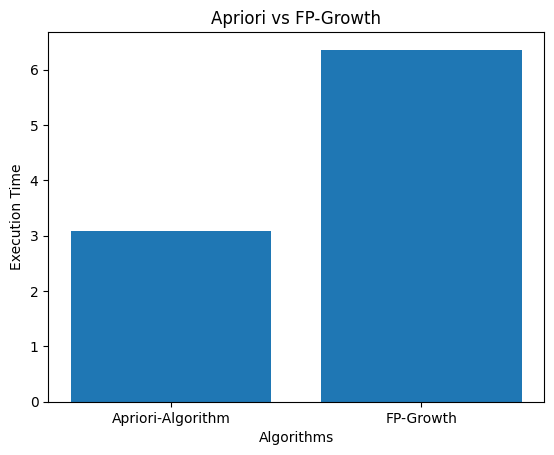

Apriori is Faster


In [17]:
algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel('Algorithms')
plt.ylabel('Execution Time')
plt.title('Apriori vs FP-Growth')
plt.show()
if exetime[0]<exetime[1]:
  print("Apriori is Faster")
elif exetime[1]<exetime[0]:
  print("FP-Growth is Faster")
else:
  print("Both are equal")
